<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-07-24 16:19:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  43.5MB/s    in 0.8s    

2024-07-24 16:19:19 (43.5 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [25]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [26]:
import pandas as pd

## Demo: How to run an sql query


In [27]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [28]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [29]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [45]:
#table_name = 'master'  # the table you wish to describe

table_name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "LanguageDesireNextYear" (
"Respondent" INTEGER,
  "LanguageDesireNextYear" TEXT
)


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


(array([6.008e+03, 2.988e+03, 6.630e+02, 1.440e+02, 5.100e+01, 4.300e+01,
        4.400e+01, 3.100e+01, 4.000e+01, 5.300e+01, 3.600e+01, 3.600e+01,
        4.300e+01, 1.300e+01, 1.480e+02, 4.000e+00, 1.100e+01, 1.100e+01,
        1.600e+01, 1.400e+01, 4.000e+00, 9.000e+00, 1.000e+00, 5.000e+00,
        5.000e+00, 6.000e+00, 9.000e+00, 7.000e+00, 0.000e+00, 1.390e+02]),
 array([      0.        ,   66666.66666667,  133333.33333333,
         200000.        ,  266666.66666667,  333333.33333333,
         400000.        ,  466666.66666667,  533333.33333333,
         600000.        ,  666666.66666667,  733333.33333333,
         800000.        ,  866666.66666667,  933333.33333333,
        1000000.        , 1066666.66666667, 1133333.33333333,
        1200000.        , 1266666.66666667, 1333333.33333333,
        1400000.        , 1466666.66666667, 1533333.33333333,
        1600000.        , 1666666.66666667, 1733333.33333333,
        1800000.        , 1866666.66666667, 1933333.33333333,
        

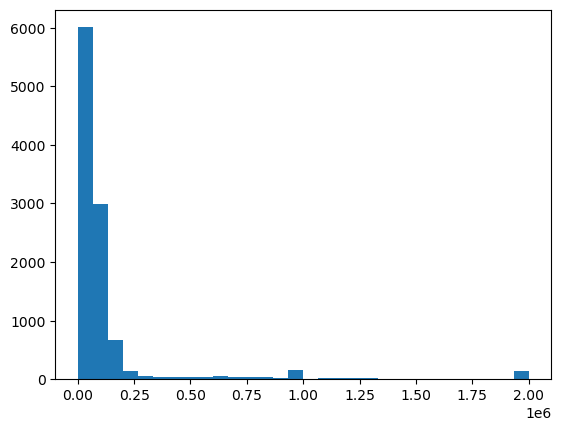

In [31]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Query1 = """
SELECT ConvertedComp 
FROM master
"""
hconvertedComp=pd.read_sql_query(Query1, conn)
plt.hist(x=hconvertedComp, bins=30)


### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

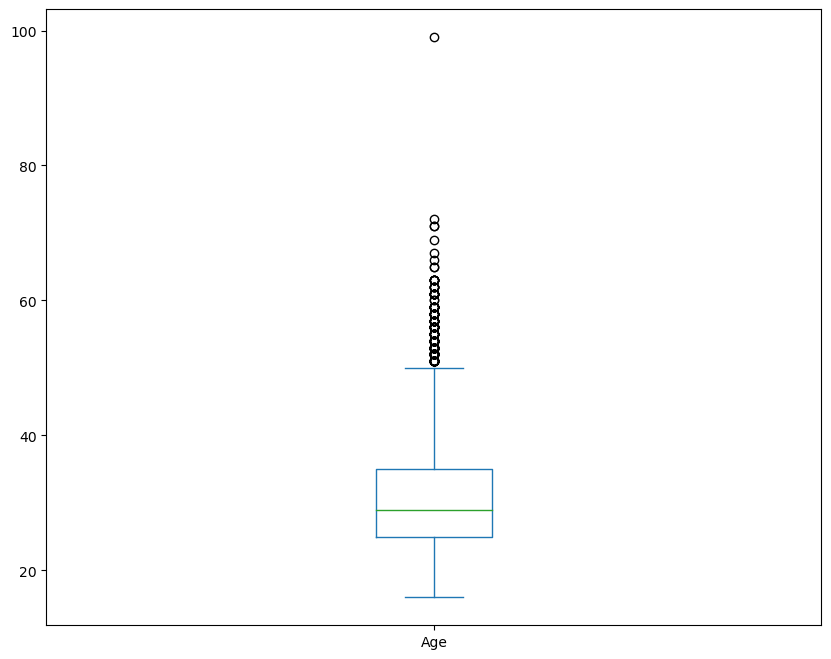

In [32]:
# your code goes here


Query2 = """
SELECT Age 
FROM master
"""

Age= pd.read_sql_query(Query2, conn)
Age.plot(kind='box', figsize=(10, 8))

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


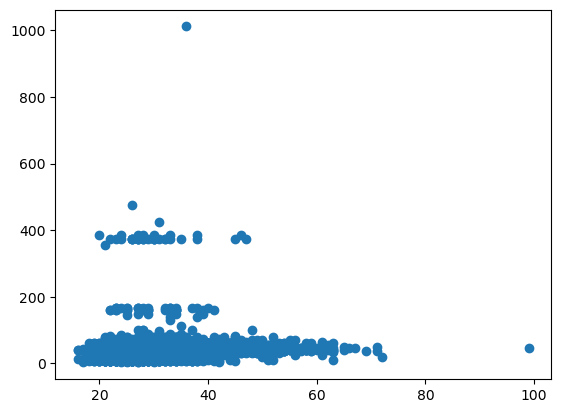

In [33]:
# your code goes here

# your code goes here
Query3= """
SELECT Age
FROM master
"""
Query4= """
SELECT WorkWeekHrs
FROM master
"""

Query5="""
SELECT Age, WorkWeekHrs
FROM master
"""
Age=pd.read_sql_query(Query3, conn)
WorkWeekHrs= pd.read_sql_query(Query4, conn)
Age_WorkWeekHrs=pd.read_sql_query(Query5, conn)
plt.scatter(x=Age, y=WorkWeekHrs)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


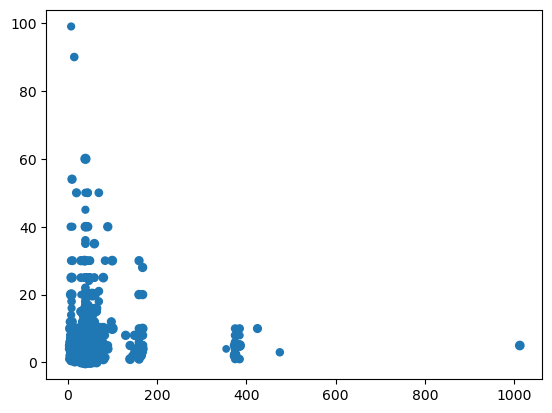

In [15]:
# your code goes here

Query6 = """
SELECT CodeRevHrs 
FROM master
"""
CodeRevHrs=pd.read_sql_query(Query6, conn)
plt.scatter(x=WorkWeekHrs, y=CodeRevHrs, s=Age)


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


   DatabaseDesireNextYear  count
0              PostgreSQL   4328
1                 MongoDB   3649
2                   Redis   3331
3                   MySQL   3281
4           Elasticsearch   2856
5    Microsoft SQL Server   2706
6                  SQLite   2437
7                Firebase   1650
8                 MariaDB   1385
9                DynamoDB   1044
10              Cassandra   1003
11                 Oracle    870
12              Other(s):    645
13              Couchbase    390


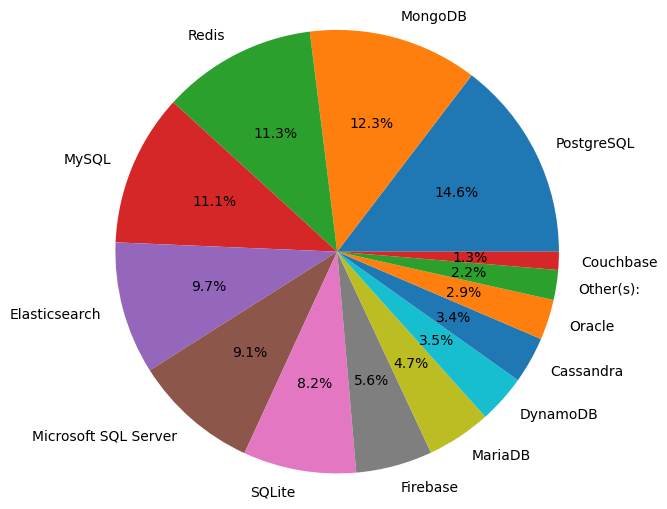

In [44]:
# your code goes here
Query7="""
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count desc limit 5
"""

DatabaseDesireNextYear= pd.read_sql_query(Query7, conn)
x = DatabaseDesireNextYear['count']
label = DatabaseDesireNextYear['DatabaseDesireNextYear']
plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)
print(DatabaseDesireNextYear)

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [46]:
# your code goes here

Query7="""
SELECT LanguageDesireNextYear, count(*) as count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count desc limit 20
"""

LWW= pd.read_sql_query(Query7, conn)
x = LWW['count']
#label = DatabaseDesireNextYear['DatabaseDesireNextYear']
#plt.pie(x, labels=label, autopct='%1.1f%%',radius=1.5)
print(LWW)

   LanguageDesireNextYear  count
0              JavaScript   6630
1                HTML/CSS   5328
2                  Python   5239
3                     SQL   5012
4              TypeScript   4088
5                      C#   3591
6   Bash/Shell/PowerShell   3097
7                    Java   2953
8                      Go   2759
9                  Kotlin   1890
10                    C++   1633
11                   Rust   1520
12                    PHP   1457
13            WebAssembly   1397
14                  Swift   1179
15                   Ruby   1029
16                      C   1028
17                  Scala    879
18                      R    850
19              Other(s):    836


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


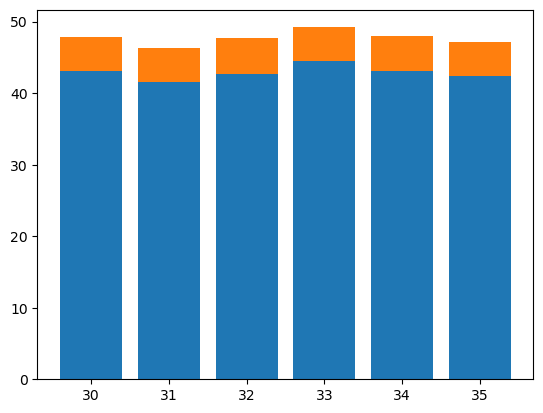

In [21]:
# your code goes here

Query8 = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age 
FROM master 
where Age between 30 and 35
group by Age
"""

z = pd.read_sql_query(Query8, conn)
WorkWeekHrs= z['Avg(WorkWeekHrs)']
CodeRevHrs= z['Avg(CodeRevHrs)']
Age= z['Age']

fig, ax = plt.subplots()

ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')

plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


,MainBranch,count(*)
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


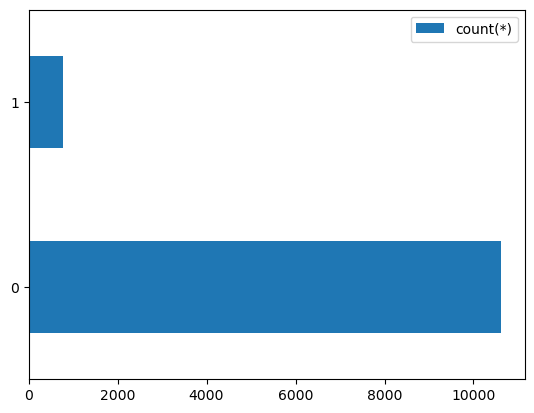

In [22]:
# your code goes here

# your code goes here
Query10="""
SELECT MainBranch, count(*)
FROM master
group by MainBranch
"""
MainBranch=pd.read_sql_query(Query10, conn)
MainBranch.plot(kind='barh')
MainBranch

Close the database connection.


In [23]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
